# Whitecap Test

This script can be used to test and visualize the whitecap reflectance as described in literature.

In [1]:
# Load modules
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

In [2]:
# Necessary variables
salinity = 0.0
alpha = 0.000002951 #2.951 * 1e-6
lmb = 3.52

wind_speeds = np.linspace(0, 20, 100)

In [3]:
# Data obtained from Koepke et al. (1984)
eff_wavelengths = [ 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1,
                    1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1,
                    2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1,
                    3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0 ]
eff_reflectance = [ 0.220, 0.220, 0.220, 0.220, 0.220, 0.220, 0.215, 0.210, 0.200, 0.190,
                    0.175, 0.155, 0.130, 0.080, 0.100, 0.105, 0.100, 0.080, 0.045, 0.055,
                    0.065, 0.060, 0.055, 0.040, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
                    0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000 ]

# Routine to compute whitecap reflectance
def whitecap_ref(wavelength, wind_speed):
    # Compute the coverage
    coverage = alpha * (wind_speed ** lmb)

    # Linearly interpolate the reflectance given the wavelength
    effective_reflectance = np.interp(wavelength, eff_wavelengths, eff_reflectance)

    return coverage * effective_reflectance

# Routine to compute whitecap reflectance from 6SV
def whitecap_ref_6sv(wavelength, wind_speed):
    # Compute the coverage
    coverage = alpha * (wind_speed ** lmb)

    # Linearly interpolate the reflectance given the wavelength
    interpolated = np.interp(wavelength, eff_wavelengths, eff_reflectance)
    effective_reflectance = interpolated

    return coverage * effective_reflectance


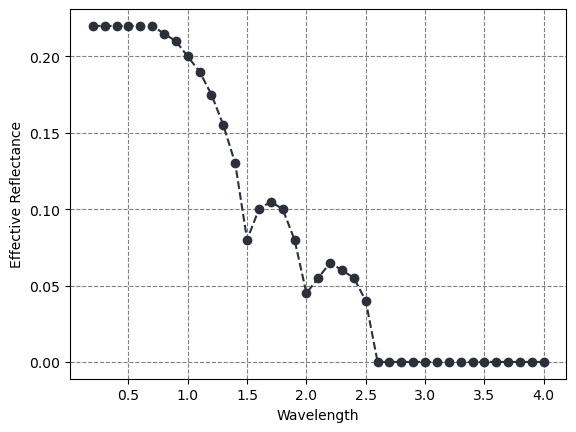

In [4]:
# Plot effective wavelength vs reflectance
plt.plot(eff_wavelengths, eff_reflectance, marker='o', linestyle='', color='#2B303A', label='Points')

# Plotting the lines connecting points with dashed lines
plt.plot(eff_wavelengths, eff_reflectance, linestyle='--', color='#2B303A', label='Dashed Line')

plt.xlabel('Wavelength')
plt.ylabel('Effective Reflectance')

plt.grid(True, linestyle='--', color='gray')

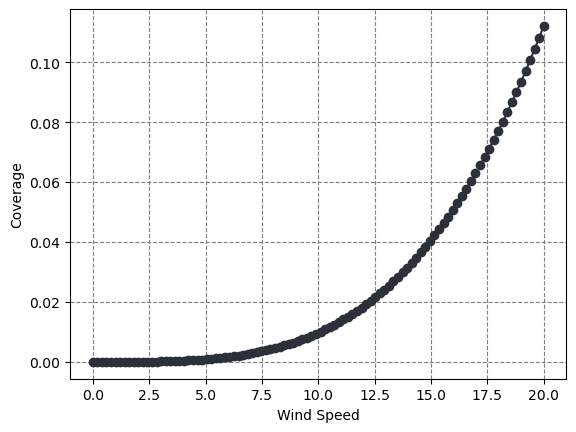

In [5]:
# Plot wind speed vs. coverage
coverages = []
for ws in wind_speeds:
    coverage = alpha * (ws ** lmb)
    coverages.append(coverage)

# Plot effective wavelength vs reflectance
plt.plot(wind_speeds, coverages, marker='o', linestyle='', color='#2B303A', label='Points')

# Plotting the lines connecting points with dashed lines
plt.plot(wind_speeds, coverages, linestyle='--', color='#2B303A', label='Dashed Line')

plt.xlabel('Wind Speed')
plt.ylabel('Coverage')

plt.grid(True, linestyle='--', color='gray')

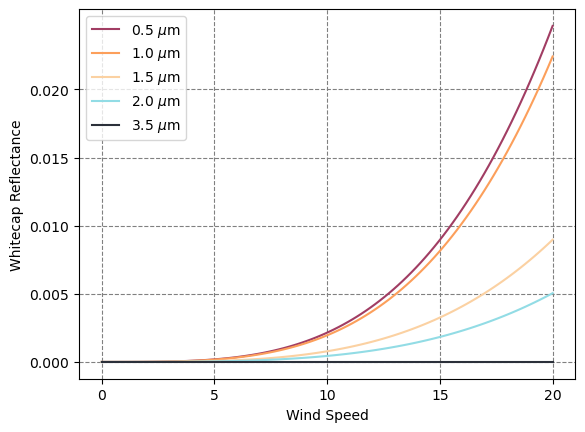

In [6]:
wavelengths = [0.5, 1.0, 1.5, 2.0, 3.5]
results = {}

for wavelength in wavelengths:
    reflectances = []
    for ws in wind_speeds:
        # Evaluate whitecap reflectance
        brdf_values = whitecap_ref(wavelength, ws)
        whitecap_reflectance = np.array(brdf_values).flatten()[0]

        reflectances.append(whitecap_reflectance)
    
    results[wavelength] = (wind_speeds, reflectances)

colors = ['#A13D63', '#FC9F5B', '#FBD1A2', '#92DCE5', '#2B303A']
for wavelength, (wind_speeds, reflectances) in results.items():
    color = colors.pop(0)

    plt.plot(wind_speeds, reflectances, label=f'{wavelength} $\mu$m', color=color)

plt.legend()
plt.xlabel('Wind Speed')
plt.ylabel('Whitecap Reflectance')

# Define ticks
xticks = np.arange(0, 21, 5)
plt.xticks(xticks)

yticks = np.arange(0, 0.021, 0.005)
plt.yticks(yticks)

# Grid on the tick lines
plt.grid(True, linestyle='--', color='gray')

plt.show()

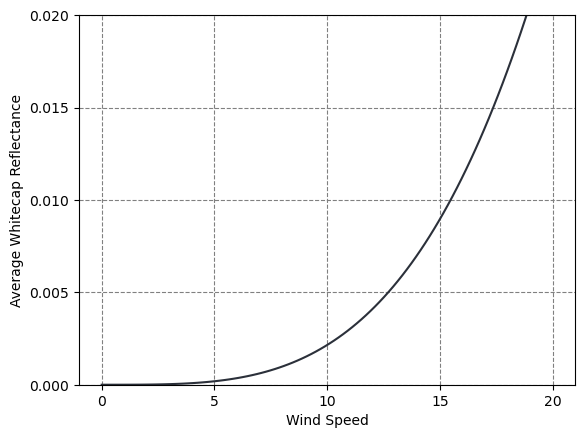

In [7]:
# Get reflectance in visible wavelengths (0.4 - 0.7)
wavelengths = [0.4, 0.5, 0.6, 0.7]
results = {}

for ws in wind_speeds:
    avg_reflectance = 0
    for wavelength in wavelengths:
        brdf_values = whitecap_ref_6sv(wavelength, ws)
        whitecap_reflectance = np.array(brdf_values).flatten()[0]
        avg_reflectance += whitecap_reflectance
    avg_reflectance /= len(wavelengths)
    results[ws] = avg_reflectance

# Plotting the results
plt.plot(results.keys(), results.values(), color='#2B303A', label='Whitecap Reflectance')
plt.xlabel('Wind Speed')
plt.ylabel('Average Whitecap Reflectance')

# Define ticks
xticks = np.arange(0, 21, 5)
plt.xticks(xticks)

yticks = np.arange(0, 0.021, 0.005)
plt.yticks(yticks)

# Cap the y-axis to 0.02
plt.ylim(0, 0.02)

# Grid on the tick lines
plt.grid(True, linestyle='--', color='gray')

plt.show()
        

In [8]:
# Make very stylish plotly plot of all different wavelengths with colors #e06666, #9dbb53 and #78c7ff
import plotly.graph_objects as go

fig = go.Figure()

# Add the different wavelengths
wavelengths = [0.5, 1.5, 3.5]
colors = ['#e06666', '#9dbb53', '#78c7ff']
index = 0
for wavelength in wavelengths:
    reflectances = []
    for ws in wind_speeds:
        # Evaluate whitecap reflectance
        brdf_values = whitecap_ref(wavelength, ws)
        whitecap_reflectance = np.array(brdf_values).flatten()[0]
        reflectances.append(whitecap_reflectance)
    
    fig.add_trace(go.Scatter(x=wind_speeds, y=reflectances, mode='lines', name=f'{wavelength} μm', line=dict(color=colors[index])))
    index += 1

fig.update_layout(title='Whitecap Reflectance vs Wind Speed',
                    xaxis_title='Wind Speed (m/s)',
                    yaxis_title='Whitecap Reflectance')

# Set the background completely transparent
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})

# Add suffix to the y-axis
fig.update_yaxes(tickprefix='', ticksuffix='  ')

# Show legend
fig.update_layout(showlegend=True)

# Color of gridlines and axes
fig.update_layout({
    # Gridlines
    'yaxis': {
        'gridcolor': 'rgba(255, 255, 255, 0.5)',
        'title': {
            'font': {
                'color': 'rgba(255, 255, 255, 1)'
            }
        }
    },
    'xaxis': {
        'gridcolor': 'rgba(255, 255, 255, 0.5)',
        'title': {
            'font': {
                'color': 'rgba(255, 255, 255, 1)'
            }
        }
    },

    # Title
    'title': {
        'font': {
            'color': 'rgba(255, 255, 255, 1)'
        }
    },

    # Tick labels
    'xaxis_tickfont': {
        'color': 'rgba(255, 255, 255, 1)'
    },
    'yaxis_tickfont': {
        'color': 'rgba(255, 255, 255, 1)'
    },

    # Legend
    'legend': {
        'font': {
            'color': 'rgba(255, 255, 255, 1)'
        }
    }
})

fig.show()